In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import datetime
from datetime import timedelta
%matplotlib inline

In [6]:
print("2-D Diffusion Equation v1.0 by Major Christopher Mihal")
print("Code executed at time")
now = datetime.datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))

2-D Diffusion Equation v1.0 by Major Christopher Mihal
Code executed at time
2018-12-06 21:27:22


In [7]:
#This is the cell where we define our variables
a = 5. # cm 
h = .1 # cm
n = int(2*a/h)+1
S = 10. # n/cm**-1
Sig_a = .2
D = 1. #cm 
L_2 = D / Sig_a
L = np.sqrt(L_2)
A1 = np.zeros(n**2)
A1.shape = (n,n)
b1 = ((h**2) * S / D)
B1 = np.zeros(n)
B1.shape = (n,1)
x_axis = np.linspace(-a,a,n)
materialnum = 1 #number of materials in medium
#boundary condition top
#boundary condition bottom
#boundary condition left
#boundary condition right
print(A1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
#input data check will go here
#user can input values for variables and python will check they are valid
#check validity of value for h
goodinput = False
while not goodinput:
    try:
        a = float(input('Enter a value for a: '))
        if a > 0:
            goodinput = True
            print("Value for a is valid. Continue")
        else:
            print("That's not a positive number")
            break
    except ValueError:
        print("Value cannot be used")

Enter a value for a: 5
Value for a is valid. Continue


In [9]:
#check validity of value for h
goodinput = False
while not goodinput:
    try:
        h = float(input('Enter a value for h: '))
        if h > 0:
            if h < a:
                goodinput = True
                print("Value for h is valid. Continue")
            else:
                print("Value for h cannot be greater than a!")
                break
        else:
            print("That's not a positive number")
            break
    except ValueError:
        print("Value cannot be used")

Enter a value for h: .1
Value for h is valid. Continue


In [10]:
n = int(2*a/h)+1

In [11]:
for i in range(0,n):
    A1[i,i] = 2+h**2/L_2
    if i < n-1: A1[i,i+1] = -1  
    if i > 0: A1[i,i-1] = -1

for i in range(0,n):
    B1[i,0]= b1
    
A1[0,0] = 2*D/h**2+Sig_a
A1[0,1] = -2*D/h**2
print(A1)

[[ 200.2   -200.       0.    ...    0.       0.       0.   ]
 [  -1.       2.002   -1.    ...    0.       0.       0.   ]
 [   0.      -1.       2.002 ...    0.       0.       0.   ]
 ...
 [   0.       0.       0.    ...    2.002   -1.       0.   ]
 [   0.       0.       0.    ...   -1.       2.002   -1.   ]
 [   0.       0.       0.    ...    0.      -1.       2.002]]


In [12]:
#define albedo for reflective boundary condition
alpha = (1-2*D/L)/(1+2*D/L)
albedo = -1/2*(1-alpha)/(1+alpha)
o = albedo
print(alpha)
print(o)
o_soln = -1/2*(1+o)/(1-o)
print(o_soln)

0.05572809000084123
-0.4472135954999579
-0.1909830056250526


In [13]:
start_time = time.clock() #putting this first lets the equations at the end run the total time it took to perform
current_time = datetime.datetime.now() #to print time of execution in output file

def thomas(A, b):
    
    # Initialize storage vectors for u and v and solution vector x; x is phi.
    n = np.size(b)
    u = np.zeros(n)
    v = np.zeros(n)
    x = np.zeros(n)
    
    
    
    u[0] = A[0,0] #specify matrix assignments 
    v[0] = b[0]
        
              
    # loop through the system.
    for i in range(1,n):
        u[i] = A[i,i] - (A[i,i-1]*A[i-1,i]) / u[i-1]
        v[i] = b[i] - (A[i,i-1]*v[i-1]) / u[i-1]
    
    # Now start backwards sub with n-1.
    x[n-1] = v[n-1]/u[n-1]
    
    # complete the backwards substitution.
    for i in range(n-2,-1,-1):
        x[i] = (v[i] - A[i,i+1]*x[i+1]) / u[i]
    return x

elapsed_time_secs = time.clock() - start_time #elapsed time
msg = "Execution took: %s secs" % timedelta(seconds=round(elapsed_time_secs))
print(msg)   

Execution took: 0:00:00 secs


In [168]:
thomas_ans = thomas(A1,B1)
true_flux = 1/(1/2*(1-o)/(1+o))*(1-np.exp(x_axis/L))/(np.exp(-a/L))
print(true_flux)
print(thomas_ans)

[  6.38377428   6.34883475   6.31229721   6.27408858   6.23413242
   6.19234881   6.14865416   6.10296108   6.05517816   6.00520982
   5.9529561    5.89831248   5.84116967   5.78141334   5.71892397
   5.65357656   5.58524039   5.51377877   5.43904875   5.36090085
   5.27917874   5.19371895   5.10435053   5.01089472   4.91316458
   4.81096461   4.70409037   4.59232809   4.47545421   4.35323492
   4.22542576   4.09177107   3.95200349   3.80584343   3.65299854
   3.49316307   3.32601729   3.15122686   2.96844214   2.77729749
   2.57741058   2.36838154   2.14979227   1.9212055    1.68216399
   1.43218957   1.17078221   0.89741901   0.61155315   0.31261281
   0.          -0.3269106   -0.66877293  -1.02627083  -1.4001194
  -1.79106647  -2.19989407  -2.62741998  -3.07449941  -3.54202666
  -4.03093693  -4.54220822  -5.07686323  -5.63597146  -6.2206513
  -6.83207232  -7.47145755  -8.14008599  -8.83929511  -9.57048355
 -10.33511395 -11.13471582 -11.97088863 -12.845305   -13.75971406
 -14.7159449

In [169]:
linsolv = np.linalg.solve(A1,B1)
print(linsolv)

[[47.80107669]
 [47.84837777]
 [47.8913756 ]
 [47.93015619]
 [47.96479708]
 [47.99536757]
 [48.0219288 ]
 [48.04453388]
 [48.06322803]
 [48.07804864]
 [48.08902534]
 [48.0961801 ]
 [48.09952721]
 [48.09907338]
 [48.0948177 ]
 [48.08675165]
 [48.0748591 ]
 [48.05911627]
 [48.03949168]
 [48.01594607]
 [47.98843235]
 [47.95689549]
 [47.92127243]
 [47.88149191]
 [47.83747438]
 [47.78913179]
 [47.73636747]
 [47.67907588]
 [47.61714245]
 [47.55044329]
 [47.47884503]
 [47.40220446]
 [47.32036829]
 [47.23317286]
 [47.14044378]
 [47.04199558]
 [46.93763138]
 [46.82714244]
 [46.71030778]
 [46.58689374]
 [46.45665349]
 [46.31932654]
 [46.17463825]
 [46.02229923]
 [45.86200481]
 [45.6934344 ]
 [45.51625086]
 [45.33009982]
 [45.13460898]
 [44.92938736]
 [44.71402452]
 [44.48808972]
 [44.2511311 ]
 [44.00267475]
 [43.74222374]
 [43.46925718]
 [43.18322914]
 [42.88356755]
 [42.5696731 ]
 [42.240918  ]
 [41.89664473]
 [41.53616475]
 [41.1587571 ]
 [40.76366697]
 [40.35010416]
 [39.91724157]
 [39.46421

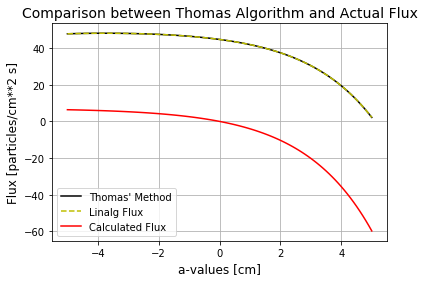

In [179]:
plt.plot(x_axis, thomas_ans, 'k', label = "Thomas' Method")
plt.plot(x_axis, linsolv, 'y', linestyle="--", label = 'Linalg Flux')
plt.plot(x_axis, true_flux, 'r', label = 'Calculated Flux')
plt.xlabel("a-values [cm]",fontsize=12)
plt.ylabel('Flux [particles/cm**2 s]',fontsize=12)
plt.title('Comparison between Thomas Algorithm and Actual Flux',fontsize=14)
plt.grid()
plt.legend();

In [171]:
max_error = abs(linsolv - thomas_ans)

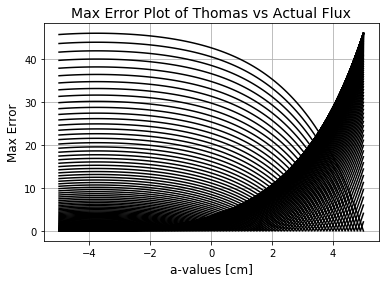

In [172]:
plt.plot(x_axis, max_error, 'k')
plt.xlabel("a-values [cm]",fontsize=12)
plt.ylabel('Max Error',fontsize=12)
plt.title('Max Error Plot of Thomas vs Actual Flux',fontsize=14)
plt.grid()

In [173]:
time.ctime()

'Thu Dec  6 22:19:12 2018'

In [174]:
print(now.strftime("%Y-%m-%d %H:%M:%S"))
print(now)

2018-12-06 21:27:22
2018-12-06 21:27:22.830448


In [175]:
Exe = time.ctime()

def output_log():
    return "2-D Diffusion Equation, v1.0 by Major Christopher Mihal" 
output = output_log()
file = open("Final_Project_Cover_Sheet.txt","w")
file.write(output)
file.write("Code executed on ")
file.write(Exe)
file.close()

In [22]:
print(np.linalg.solve(A1, B1))

[[47.80107669]
 [47.84837777]
 [47.8913756 ]
 [47.93015619]
 [47.96479708]
 [47.99536757]
 [48.0219288 ]
 [48.04453388]
 [48.06322803]
 [48.07804864]
 [48.08902534]
 [48.0961801 ]
 [48.09952721]
 [48.09907338]
 [48.0948177 ]
 [48.08675165]
 [48.0748591 ]
 [48.05911627]
 [48.03949168]
 [48.01594607]
 [47.98843235]
 [47.95689549]
 [47.92127243]
 [47.88149191]
 [47.83747438]
 [47.78913179]
 [47.73636747]
 [47.67907588]
 [47.61714245]
 [47.55044329]
 [47.47884503]
 [47.40220446]
 [47.32036829]
 [47.23317286]
 [47.14044378]
 [47.04199558]
 [46.93763138]
 [46.82714244]
 [46.71030778]
 [46.58689374]
 [46.45665349]
 [46.31932654]
 [46.17463825]
 [46.02229923]
 [45.86200481]
 [45.6934344 ]
 [45.51625086]
 [45.33009982]
 [45.13460898]
 [44.92938736]
 [44.71402452]
 [44.48808972]
 [44.2511311 ]
 [44.00267475]
 [43.74222374]
 [43.46925718]
 [43.18322914]
 [42.88356755]
 [42.5696731 ]
 [42.240918  ]
 [41.89664473]
 [41.53616475]
 [41.1587571 ]
 [40.76366697]
 [40.35010416]
 [39.91724157]
 [39.46421